In [1]:
import copy
import os
import time
from PIL import Image, ImageOps, ImageChops, ImageDraw, ImageFilter

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from tqdm import tqdm
import csv
import cv2
from torchvision.utils import save_image

/anaconda/envs/hw_094295_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 16
NUM_EPOCHS = 20
LR = 0.001
np.random.seed(0)
torch.manual_seed(0)

base_dir = os.path.join("/home/student/hw2_094295", "all_data")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def add_background_noise(source_path):
    noise_path = "/home/student/hw2_094295/noisy_background/noise_" + str(np.random.randint(0,20))+".png"
    source_image = Image.open(source_path)
    noise_image = Image.open(noise_path).resize(source_image.size)
    random_choice = np.random.randint(1, 4)
    if random_choice == 1:
        noise_image = noise_image.transpose(Image.FLIP_TOP_BOTTOM)
    elif random_choice == 2:
        noise_image = ImageOps.mirror(noise_image)
    else:
        noise_image = noise_image.transpose(Image.FLIP_TOP_BOTTOM)
        noise_image = ImageOps.mirror(noise_image)
    mask = Image.new("L", source_image.size, 120)
    noisy_image = Image.composite(noise_image, source_image, mask)
    # noisy_image_array = np.array(noisy_image)
    # noisy_image_array = np.where(noisy_image_array < 255, 0, 255)
    # noisy_image = Image.fromarray(noisy_image_array.astype('uint8')).convert("L")
    return noisy_image

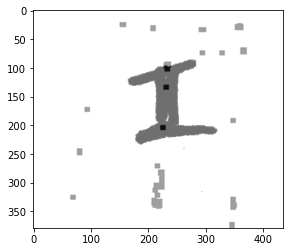

In [4]:
img_path = "/home/student/hw2_094295/data/train/i/ab4e0182-ce5d-11eb-b317-38f9d35ea60f.png"
noisy_image = add_background_noise(img_path)
noisy_image.save("/home/student/hw2_094295/exp.png")
plt.imshow(noisy_image, cmap="gray")
plt.show()

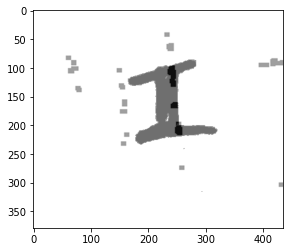

In [108]:
img_path = "/home/student/hw2_094295/data/train/i/ab4e0182-ce5d-11eb-b317-38f9d35ea60f.png"
noisy_image = add_background_noise(img_path)
noisy_image.save("/home/student/hw2_094295/exp.png")
plt.imshow(noisy_image, cmap="gray")
plt.show()